In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

Using TensorFlow backend.


In [2]:
random_state = 87

In [3]:
import time

dense_layers = [0,1,2]
layer_sizes = [18, 24, 36]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        NAME = '{}-dense-{}-nodes-{}'.format(dense_layer, layer_size, int(time.time()))
        print(NAME)

0-dense-18-nodes-1581552945
0-dense-24-nodes-1581552945
0-dense-36-nodes-1581552945
1-dense-18-nodes-1581552945
1-dense-24-nodes-1581552945
1-dense-36-nodes-1581552945
2-dense-18-nodes-1581552945
2-dense-24-nodes-1581552945
2-dense-36-nodes-1581552945


In [4]:
learning_data = pd.read_csv('learning_data.csv')

In [5]:
learning_data.head()

,NameLower,Rank,WinPercentage,BonusPercentage,Wins,Losses,EloPoints,TotalPoints,Big Ten,Big 12,ACC,EIWA,PAC 12,MAC,EWL,EligibilityYear_num
0,spencerlee,1,88.46,82.61,23,3,1618.78,25.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,sebastianrivera,2,93.75,63.33,30,2,1585.02,15.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,nickpiccininni,3,94.59,80.00,35,2,1581.12,15.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3,jackmueller,4,95.45,80.95,21,1,1558.95,19.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
4,vitaliarujau,5,88.57,61.29,31,4,1537.20,15.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [6]:
learning_data.set_index('NameLower',inplace=True)

In [7]:
learning_data.head()

,Rank,WinPercentage,BonusPercentage,Wins,Losses,EloPoints,TotalPoints,Big Ten,Big 12,ACC,EIWA,PAC 12,MAC,EWL,EligibilityYear_num
NameLower,,,,,,,,,,,,,,,
spencerlee,1,88.46,82.61,23,3,1618.78,25.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
sebastianrivera,2,93.75,63.33,30,2,1585.02,15.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
nickpiccininni,3,94.59,80.00,35,2,1581.12,15.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
jackmueller,4,95.45,80.95,21,1,1558.95,19.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
vitaliarujau,5,88.57,61.29,31,4,1537.20,15.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [8]:
X = learning_data.drop(['TotalPoints'],axis=1)
y = learning_data['TotalPoints']

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
mms = MinMaxScaler()

In [11]:
X_mm_scaled = mms.fit_transform(X)

C:\Users\fq1228hj\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
pd.DataFrame(X_mm_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.778800,0.912149,0.566667,0.157895,0.801925,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
1,0.018868,0.880199,0.682953,0.800000,0.105263,0.692909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
2,0.037736,0.896301,0.881122,0.966667,0.105263,0.680315,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.666667
3,0.056604,0.912785,0.892416,0.500000,0.052632,0.608725,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667
4,0.075472,0.780909,0.658702,0.833333,0.210526,0.538491,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
5,0.094340,0.744489,0.661674,0.666667,0.210526,0.459926,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000
6,0.113208,0.726088,0.755587,1.000000,0.315789,0.420434,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
7,0.132075,0.661683,0.694365,0.733333,0.315789,0.408325,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
8,0.188679,0.574085,0.524489,0.266667,0.210526,0.307188,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000
9,0.207547,0.689093,0.390276,0.833333,0.315789,0.297081,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333


In [13]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn import metrics
from tensorflow.keras.callbacks import TensorBoard

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_mm_scaled, y, test_size=0.3, random_state=random_state)

In [15]:
model = Sequential()
model.add(Dense(36, input_dim=14, kernel_initializer='normal', activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                888       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 1,453
Trainable params: 1,453
Non-trainable params: 0
_________________________________________________________________


In [16]:
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [17]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

Instructions for updating:
Use tf.cast instead.


In [18]:
history = model.fit(X_train, y_train, epochs=400, batch_size=50,  verbose=1, validation_split=0.2, callbacks=[tensorboard])

Train on 160 samples, validate on 41 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
160/160 [==============================] - 1s 4ms/sample - loss: 65.2786 - mean_squared_error: 65.2786 - val_loss: 49.3370 - val_mean_squared_error: 49.3370
Epoch 2/400
160/160 [==============================] - 0s 75us/sample - loss: 64.3573 - mean_squared_error: 64.3573 - val_loss: 48.4721 - val_mean_squared_error: 48.4721
Epoch 3/400
160/160 [==============================] - 0s 150us/sample - loss: 63.2456 - mean_squared_error: 63.2456 - val_loss: 47.4555 - val_mean_squared_error: 47.4555
Epoch 4/400
160/160 [==============================] - 0s 75us/sample - loss: 62.0994 - mean_squared_error: 62.0994 - val_loss: 46.3053 - val_mean_squared_error: 46.3053
Epoch 5/400
160/160 [==============================] - 0s 75us/sample - loss: 60.7182 - mean_squared_error: 60.7182 - val_loss: 45.1027 - val_mean_squared_error: 45.1027
Epoch 6/400
160/160 [==============================] - 0s

160/160 [==============================] - 0s 125us/sample - loss: 19.3363 - mean_squared_error: 19.3363 - val_loss: 8.2959 - val_mean_squared_error: 8.2959
Epoch 47/400
160/160 [==============================] - 0s 75us/sample - loss: 18.7518 - mean_squared_error: 18.7518 - val_loss: 7.9023 - val_mean_squared_error: 7.9023
Epoch 48/400
160/160 [==============================] - 0s 100us/sample - loss: 18.2699 - mean_squared_error: 18.2699 - val_loss: 7.4979 - val_mean_squared_error: 7.4979
Epoch 49/400
160/160 [==============================] - 0s 100us/sample - loss: 17.7655 - mean_squared_error: 17.7655 - val_loss: 7.1755 - val_mean_squared_error: 7.1755
Epoch 50/400
160/160 [==============================] - 0s 100us/sample - loss: 17.2277 - mean_squared_error: 17.2277 - val_loss: 6.7992 - val_mean_squared_error: 6.7992
Epoch 51/400
160/160 [==============================] - 0s 100us/sample - loss: 16.7885 - mean_squared_error: 16.7885 - val_loss: 6.4508 - val_mean_squared_error: 6

160/160 [==============================] - 0s 100us/sample - loss: 8.9619 - mean_squared_error: 8.9619 - val_loss: 3.2610 - val_mean_squared_error: 3.2610
Epoch 95/400
160/160 [==============================] - 0s 125us/sample - loss: 8.9069 - mean_squared_error: 8.9069 - val_loss: 3.2673 - val_mean_squared_error: 3.2673
Epoch 96/400
160/160 [==============================] - 0s 100us/sample - loss: 8.8683 - mean_squared_error: 8.8683 - val_loss: 3.2831 - val_mean_squared_error: 3.2831
Epoch 97/400
160/160 [==============================] - 0s 100us/sample - loss: 8.8462 - mean_squared_error: 8.8462 - val_loss: 3.3003 - val_mean_squared_error: 3.3003
Epoch 98/400
160/160 [==============================] - 0s 75us/sample - loss: 8.8084 - mean_squared_error: 8.8084 - val_loss: 3.3133 - val_mean_squared_error: 3.3133
Epoch 99/400
160/160 [==============================] - 0s 100us/sample - loss: 8.7725 - mean_squared_error: 8.7725 - val_loss: 3.3245 - val_mean_squared_error: 3.3245
Epoch 

Epoch 143/400
160/160 [==============================] - 0s 75us/sample - loss: 7.8848 - mean_squared_error: 7.8848 - val_loss: 3.2035 - val_mean_squared_error: 3.2035
Epoch 144/400
160/160 [==============================] - 0s 75us/sample - loss: 7.8731 - mean_squared_error: 7.8731 - val_loss: 3.2412 - val_mean_squared_error: 3.2412
Epoch 145/400
160/160 [==============================] - 0s 75us/sample - loss: 7.9202 - mean_squared_error: 7.9202 - val_loss: 3.2456 - val_mean_squared_error: 3.2456
Epoch 146/400
160/160 [==============================] - 0s 75us/sample - loss: 7.9307 - mean_squared_error: 7.9307 - val_loss: 3.2511 - val_mean_squared_error: 3.2511
Epoch 147/400
160/160 [==============================] - 0s 100us/sample - loss: 7.9170 - mean_squared_error: 7.9170 - val_loss: 3.1938 - val_mean_squared_error: 3.1938
Epoch 148/400
160/160 [==============================] - 0s 100us/sample - loss: 7.8789 - mean_squared_error: 7.8789 - val_loss: 3.2377 - val_mean_squared_erro

160/160 [==============================] - 0s 100us/sample - loss: 7.5295 - mean_squared_error: 7.5295 - val_loss: 3.0067 - val_mean_squared_error: 3.0067
Epoch 192/400
160/160 [==============================] - 0s 75us/sample - loss: 7.4743 - mean_squared_error: 7.4743 - val_loss: 2.9007 - val_mean_squared_error: 2.9007
Epoch 193/400
160/160 [==============================] - 0s 100us/sample - loss: 7.4104 - mean_squared_error: 7.4104 - val_loss: 2.8317 - val_mean_squared_error: 2.8317
Epoch 194/400
160/160 [==============================] - 0s 100us/sample - loss: 7.4716 - mean_squared_error: 7.4716 - val_loss: 2.8249 - val_mean_squared_error: 2.8249
Epoch 195/400
160/160 [==============================] - 0s 125us/sample - loss: 7.5667 - mean_squared_error: 7.5667 - val_loss: 2.8621 - val_mean_squared_error: 2.8621
Epoch 196/400
160/160 [==============================] - 0s 125us/sample - loss: 7.6644 - mean_squared_error: 7.6644 - val_loss: 2.8617 - val_mean_squared_error: 2.8617
E

160/160 [==============================] - 0s 75us/sample - loss: 7.0636 - mean_squared_error: 7.0636 - val_loss: 2.7692 - val_mean_squared_error: 2.7692
Epoch 240/400
160/160 [==============================] - 0s 75us/sample - loss: 7.0586 - mean_squared_error: 7.0586 - val_loss: 2.7735 - val_mean_squared_error: 2.7735
Epoch 241/400
160/160 [==============================] - 0s 100us/sample - loss: 7.0497 - mean_squared_error: 7.0497 - val_loss: 2.7638 - val_mean_squared_error: 2.7638
Epoch 242/400
160/160 [==============================] - 0s 75us/sample - loss: 7.0574 - mean_squared_error: 7.0574 - val_loss: 2.7691 - val_mean_squared_error: 2.7691
Epoch 243/400
160/160 [==============================] - 0s 100us/sample - loss: 7.0553 - mean_squared_error: 7.0553 - val_loss: 2.7420 - val_mean_squared_error: 2.7420
Epoch 244/400
160/160 [==============================] - 0s 100us/sample - loss: 7.0346 - mean_squared_error: 7.0346 - val_loss: 2.7470 - val_mean_squared_error: 2.7470
Epo

160/160 [==============================] - 0s 75us/sample - loss: 6.7927 - mean_squared_error: 6.7927 - val_loss: 2.4951 - val_mean_squared_error: 2.4951
Epoch 288/400
160/160 [==============================] - 0s 100us/sample - loss: 6.7348 - mean_squared_error: 6.7348 - val_loss: 2.5281 - val_mean_squared_error: 2.5281
Epoch 289/400
160/160 [==============================] - 0s 75us/sample - loss: 6.7411 - mean_squared_error: 6.7411 - val_loss: 2.5364 - val_mean_squared_error: 2.5364
Epoch 290/400
160/160 [==============================] - 0s 100us/sample - loss: 6.7164 - mean_squared_error: 6.7164 - val_loss: 2.5367 - val_mean_squared_error: 2.5367
Epoch 291/400
160/160 [==============================] - 0s 150us/sample - loss: 6.7167 - mean_squared_error: 6.7167 - val_loss: 2.5247 - val_mean_squared_error: 2.5247
Epoch 292/400
160/160 [==============================] - 0s 125us/sample - loss: 6.7552 - mean_squared_error: 6.7552 - val_loss: 2.5271 - val_mean_squared_error: 2.5271
Ep

160/160 [==============================] - 0s 125us/sample - loss: 6.4237 - mean_squared_error: 6.4237 - val_loss: 2.4142 - val_mean_squared_error: 2.4142
Epoch 336/400
160/160 [==============================] - 0s 100us/sample - loss: 6.4098 - mean_squared_error: 6.4098 - val_loss: 2.3972 - val_mean_squared_error: 2.3972
Epoch 337/400
160/160 [==============================] - 0s 100us/sample - loss: 6.3975 - mean_squared_error: 6.3975 - val_loss: 2.3795 - val_mean_squared_error: 2.3795
Epoch 338/400
160/160 [==============================] - 0s 150us/sample - loss: 6.3867 - mean_squared_error: 6.3867 - val_loss: 2.3575 - val_mean_squared_error: 2.3575
Epoch 339/400
160/160 [==============================] - 0s 100us/sample - loss: 6.3832 - mean_squared_error: 6.3832 - val_loss: 2.3267 - val_mean_squared_error: 2.3267
Epoch 340/400
160/160 [==============================] - 0s 125us/sample - loss: 6.4216 - mean_squared_error: 6.4216 - val_loss: 2.3129 - val_mean_squared_error: 2.3129


160/160 [==============================] - 0s 125us/sample - loss: 6.1292 - mean_squared_error: 6.1292 - val_loss: 2.2940 - val_mean_squared_error: 2.2940
Epoch 384/400
160/160 [==============================] - 0s 150us/sample - loss: 6.1178 - mean_squared_error: 6.1178 - val_loss: 2.2659 - val_mean_squared_error: 2.2659
Epoch 385/400
160/160 [==============================] - 0s 150us/sample - loss: 6.1262 - mean_squared_error: 6.1262 - val_loss: 2.2654 - val_mean_squared_error: 2.2654
Epoch 386/400
160/160 [==============================] - 0s 125us/sample - loss: 6.1000 - mean_squared_error: 6.1000 - val_loss: 2.2153 - val_mean_squared_error: 2.2153
Epoch 387/400
160/160 [==============================] - 0s 125us/sample - loss: 6.1030 - mean_squared_error: 6.1030 - val_loss: 2.1846 - val_mean_squared_error: 2.1846
Epoch 388/400
160/160 [==============================] - 0s 100us/sample - loss: 6.1115 - mean_squared_error: 6.1115 - val_loss: 2.1717 - val_mean_squared_error: 2.1717


In [19]:
df1 = pd.DataFrame(y_test)

In [20]:
preds = model.predict(X_test)

In [21]:
for i in range(0,len(preds)):
    if preds[i] < 0:
        preds[i] = 0
        

In [22]:
df1['Predicted'] = preds

In [23]:
print(np.sqrt(metrics.mean_squared_error(y_test,list(df1['Predicted']))))

1.9999675459106043


C:\Users\fq1228hj\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(27.125, 0.5, 'Predicted Y')

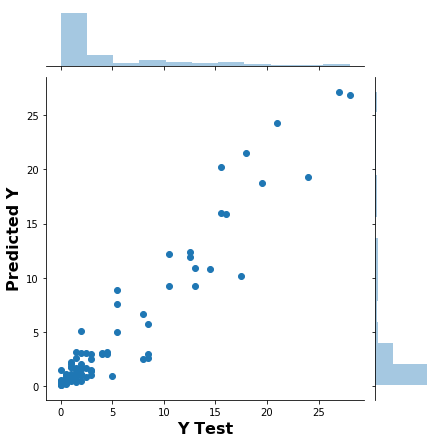

In [24]:
p = sns.jointplot(list(df1['TotalPoints']), list(df1['Predicted']))
p.set_axis_labels('x', 'y', fontsize=16)
p.ax_joint.set_xlabel('Y Test', fontweight='bold')
p.ax_joint.set_ylabel('Predicted Y', fontweight='bold')

In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df1)

                     TotalPoints  Predicted
NameLower                                  
brycewest                    0.0   0.139601
devinskatzka                 8.5   5.746366
josephmckenna               19.5  18.774614
mitchmoore                   2.5   1.670608
coleverner                   0.5   0.562828
brycesteiert                 8.5   2.631788
sawyerroot                   0.0   0.427669
mattkolodzik                10.5  12.214272
jasonnolf                   27.0  27.189846
tomsleigh                    2.0   1.746610
tateorndorff                 2.0   1.074408
zachelam                     5.0   0.980475
seanfausz                    4.0   3.050013
jordanwood                  13.0  10.948646
danreed                      0.5   0.277264
anthonycefolo                0.0   0.165493
carsonbrolsma                0.5   0.735767
colstondiblasi               0.0   0.106933
benharvey                    2.0   2.064315
mylesmartin                 18.0  21.550619
chadred                      8.5

In [26]:
df1

,TotalPoints,Predicted
NameLower,,
brycewest,0.0,0.139601
devinskatzka,8.5,5.746366
josephmckenna,19.5,18.774614
mitchmoore,2.5,1.670608
coleverner,0.5,0.562828
brycesteiert,8.5,2.631788
sawyerroot,0.0,0.427669
mattkolodzik,10.5,12.214272
jasonnolf,27.0,27.189846
